# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [ ]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
df_mercado_trends = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv',
index_col='Date', parse_dates=['Date'])

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-3-bc7ae3470e10>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv',


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [ ]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: title={'center': 'Google Hourly Search Trends for May 2020'}, xlabel='Date and Time (May 2020)'>

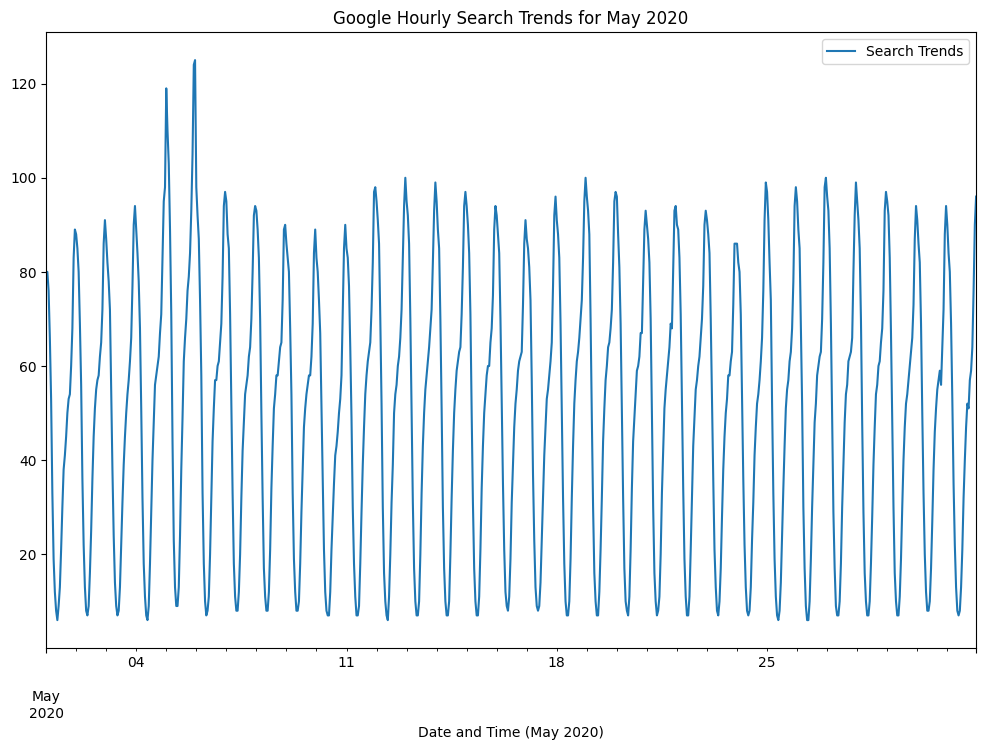

In [ ]:
# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc['2020-05-01':'2020-05-31']
df_may_2020.head()

# Plot to visualize the data for May 2020
df_may_2020.plot(figsize=(12, 8), title="Google Hourly Search Trends for May 2020",
                 xlabel="Date and Time (May 2020)")

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [ ]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020.sum()

# View the traffic_may_2020 value
traffic_may_2020

Search Trends    38181
dtype: int64

In [ ]:
# Calcluate the monthly median search traffic across all months Group the
# DataFrame by index year and then index month, chain the sum and then the
# median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
median_monthly_traffic

Search Trends    35172.5
dtype: float64

In [ ]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic


Search Trends    1.085536
dtype: float64

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, we sliced May, 2020 and compared our results against the median of all other months between 06/1/2016 - 9/8/2020 and found that the result is greater than 1, meaning that the search traffic for May 2020 was higher than the median of all other monthly traffic.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

<Axes: xlabel='Date'>

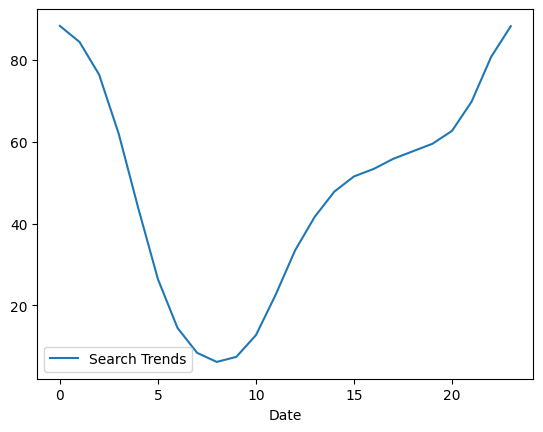

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
df_mercado_trends.groupby(df_mercado_trends.index.hour).mean().plot()


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<Axes: xlabel='day'>

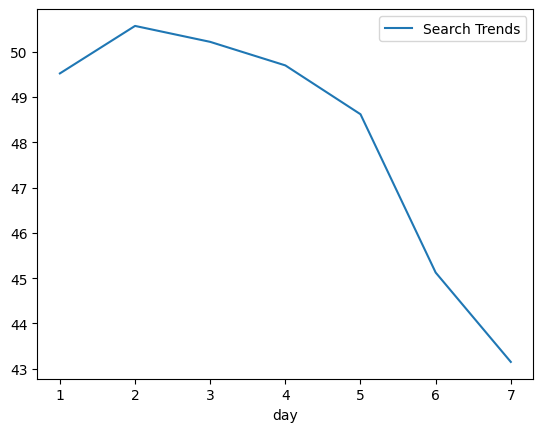

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`
df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day).mean().plot()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<Axes: xlabel='week'>

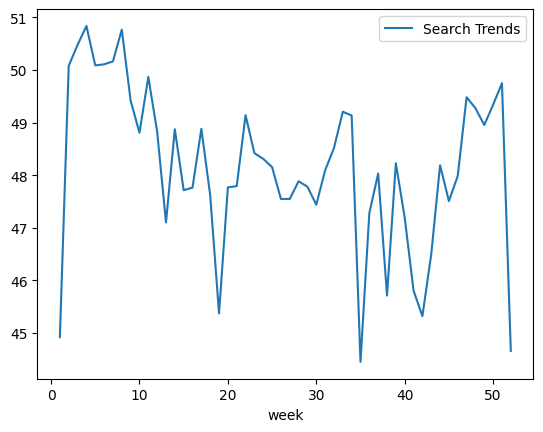

In [ ]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean().plot()



##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**  Yes, the analysis reveals distinct time-based trends across the various plots:

1. Hourly Trends: The first graph shows that search traffic is less active in the morning and increases towards the evening. The trend begins around 11 AM, peaks around 12 AM, and then declines, illustrating a typical daily usage pattern with peak activity late at night.
2. Daily Trends: According to the second graph, search traffic varies significantly throughout the week. The start of the week (Monday to Thursday) experiences higher traffic, with a noticeable decline during the weekend. This suggests that weekdays are prime for targeted marketing efforts.
3. Weekly Trends Over the Year: The third graph demonstrates fluctuations throughout the year, with a notable spike in search traffic leading up to holiday festivals, followed by a sharp decline. This seasonal trend indicates that the weeks leading up to holidays are critical periods for intensifying marketing activities, particularly around mid to late December.

Overall, this suggest that strategic marketing efforts should focus on weekday evenings, especially Tuesdays from 7 PM - 12:am, to capitalize on the highest traffic volumes and enhance ROI.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [12]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: title={'center': 'MercadoLibre Stock Price'}, xlabel='date'>

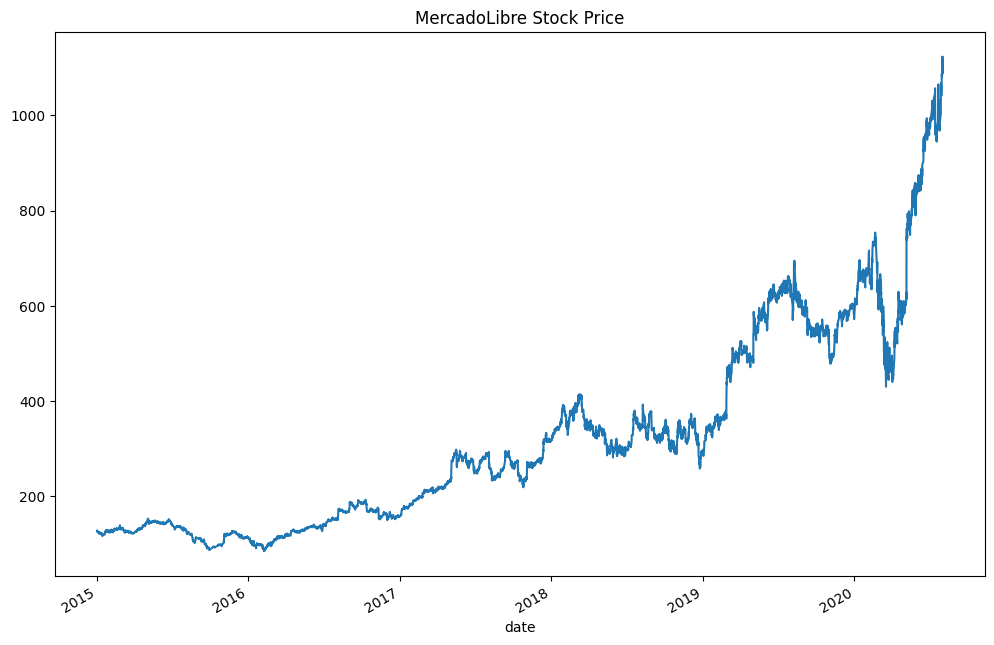

In [13]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock['close'].plot(figsize=(12, 8), title="MercadoLibre Stock Price")


In [14]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_mercado_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()


# View the first and last five rows of the DataFrame
display(df_mercado_combined.head())
display(df_mercado_combined.tail())


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [ ]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_mercado_combined.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())


,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


array([<Axes: >, <Axes: >], dtype=object)

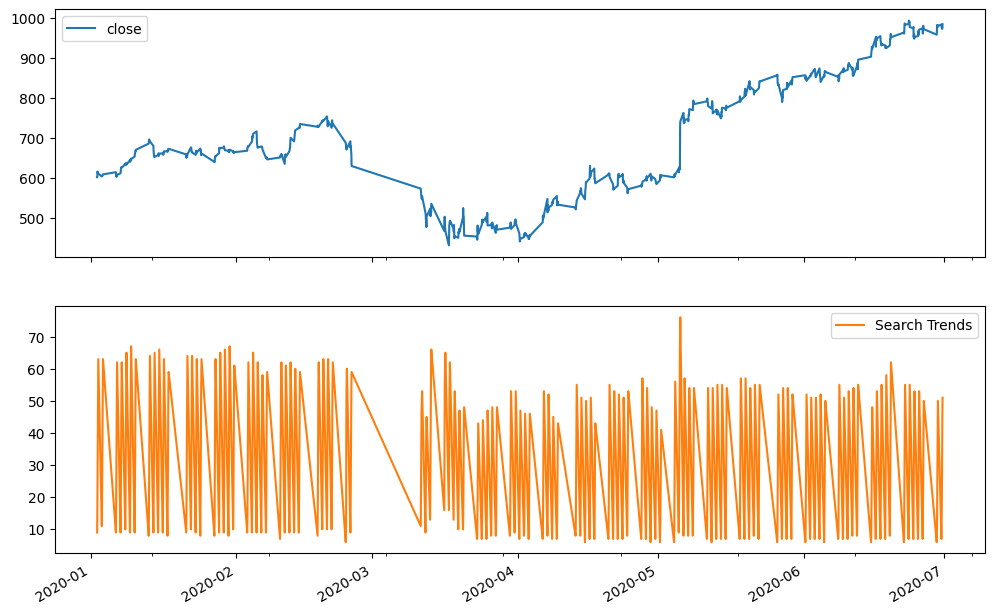

In [ ]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
first_half_2020.plot(subplots=True, figsize=(12, 8))


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Upon analyzing the trends within the time series data, it is evident that both the search traffic and stock prices experienced a significant drop in March 2020, aligning with the initial impact of global events on financial markets. This simultaneous decline suggests a correlation where external market conditions affect both consumer interest (as reflected in search trends) and financial performance (as reflected in stock prices).
Following this drop, there was a notable rebound and upward trend in both the search traffic and stock prices, particularly evident from April 2020 onwards. This recovery phase coincides with the increased demand for e-commerce platforms as consumers shifted to online shopping due to global restrictions, further supporting the interconnection between search interest and stock market performance.
2. Narrative Observations:

March 2020: Both datasets show a sharp decline, highlighting the immediate reaction to the pandemic. This trend is crucial as it indicates the vulnerability of market conditions to sudden external shocks.
Post-March 2020: The subsequent recovery and upward trends across both datasets are significant. They not only demonstrate resilience but also suggest that increased search traffic potentially forecasts an improvement in stock prices, driven by heightened consumer interest and activity on the platform.
Conclusion:
The analysis confirms that there is a discernible pattern where search trends and stock prices are interconnected, particularly in response to external market events. The initial drop followed by a recovery suggests that monitoring search trends could provide insights into future stock performance, particularly in times of market uncertainty. This relationship underscores the importance of integrating search data analytics into financial forecasting and strategic planning to capitalize on predictive indicators of market behavior.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [21]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_mercado_combined['Lagged Search Trends'] = df_mercado_combined['Search Trends'].shift(1)



In [22]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado_combined['Stock Volatility'] = df_mercado_combined['close'].pct_change().rolling(4).std()



<Axes: title={'center': 'MercadoLibre Stock Volatility'}>

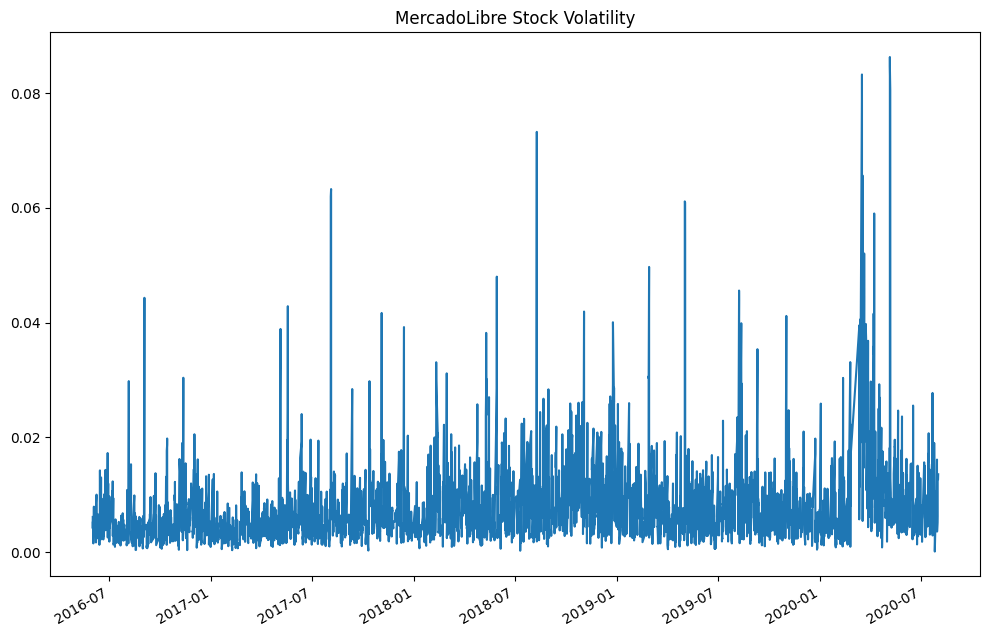

In [23]:
# Visualize the stock volatility
df_mercado_combined['Stock Volatility'].plot(figsize=(12, 8), title="MercadoLibre Stock Volatility")


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [24]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_mercado_combined['Hourly Stock Return'] = df_mercado_combined['close'].pct_change()


In [25]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_mercado_combined.head())
display(df_mercado_combined.tail())

## Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
## This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado_combined['Stock Volatility'] = df_mercado_combined['close'].pct_change().rolling(4).std()

,close,Search Trends,Stock Volatility,Hourly Stock Return,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,NaN,0.010876,6.0
2016-06-01 11:00:00,136.56,22.0,NaN,-0.000512,12.0
2016-06-01 12:00:00,136.42,33.0,NaN,-0.001025,22.0
2016-06-01 13:00:00,136.10,40.0,0.006134,-0.002346,33.0


,close,Search Trends,Stock Volatility,Hourly Stock Return,Lagged Search Trends
2020-07-31 11:00:00,1105.780,20.0,0.012837,0.006380,11.0
2020-07-31 12:00:00,1087.925,32.0,0.013549,-0.016147,20.0
2020-07-31 13:00:00,1095.800,41.0,0.013295,0.007239,32.0
2020-07-31 14:00:00,1110.650,47.0,0.013001,0.013552,41.0
2020-07-31 15:00:00,1122.510,53.0,0.013566,0.010678,47.0


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [26]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** In short No. There is a correlation Between Lagged Search Trends and Stock Volatility:
The correlation coefficient between Lagged Search Trends and Stock Volatility is approximately -0.148. This indicates a slight relationship, suggesting that increases in search traffic could slightly precede decreases in stock volatility. However, this correlation is weak, negative and far from a level that would suggest reliable predictive power.

Correlation Between Lagged Search Trends and Hourly Stock Return also exist but the correlation coefficient here is approximately 0.0179, indicating an extremely weak positive relationship.

Conclusion:
The analysis reveals that while there are detectable correlations between lagged search trends and stock-related metrics, these correlations are too weak to serve as a reliable basis for predictions. The slight negative correlation with stock volatility might indicate that higher search activity could slightly lead to less volatility, but the strength of this relationship does not support strong predictive conclusions. The almost negligible correlation with stock returns further underscores the limited direct impact of search trends on immediate stock price movements.

Given these findings, it would be prudent for the finance and marketing teams to consider that while search data provides valuable insights into consumer interest, its direct utility in predicting stock price movements or volatility is limited. It would be more beneficial to integrate this data with other variables and broader market analyses to enhance forecasting models for better strategic planning and risk management.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [28]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()


# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends_reset.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_mercado_trends_reset.head())
display(df_mercado_trends_reset.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [29]:
# Call the Prophet function, store as an object
model = Prophet()

In [30]:
# Fit the time-series model.
model.fit(df_mercado_trends_reset)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg06vetqc/xh88gsym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg06vetqc/kzch3u_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55377', 'data', 'file=/tmp/tmpg06vetqc/xh88gsym.json', 'init=/tmp/tmpg06vetqc/kzch3u_z.json', 'output', 'file=/tmp/tmpg06vetqc/prophet_modelwekuyoc8/prophet_model-20240509182539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:25:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:26:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future.tail()


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [32]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast = model.predict(future)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.458400,98.469545,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.719111,94.769932,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.069758,84.036845,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.360670,68.895706,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,34.992244,51.748246,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

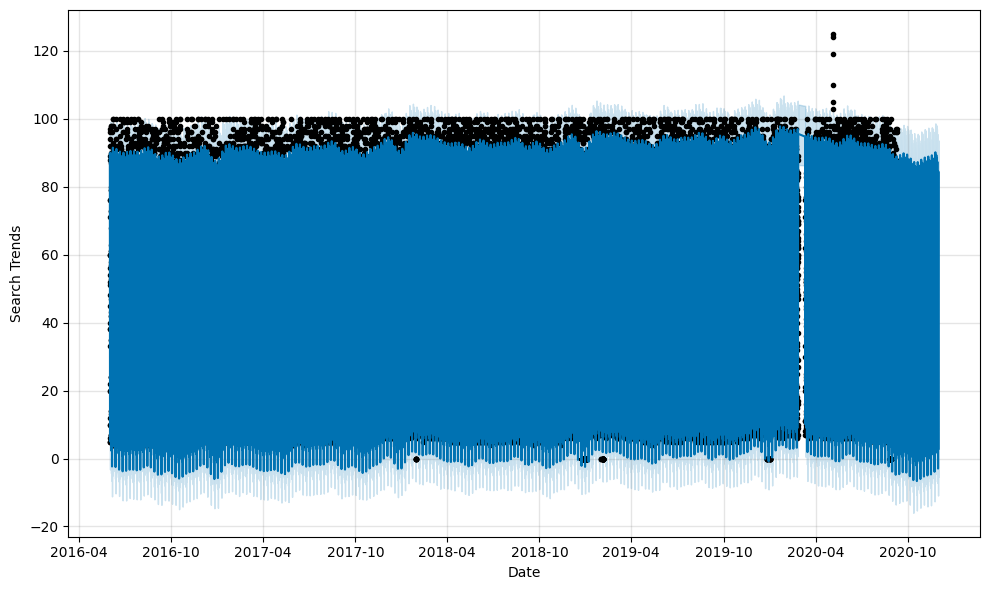

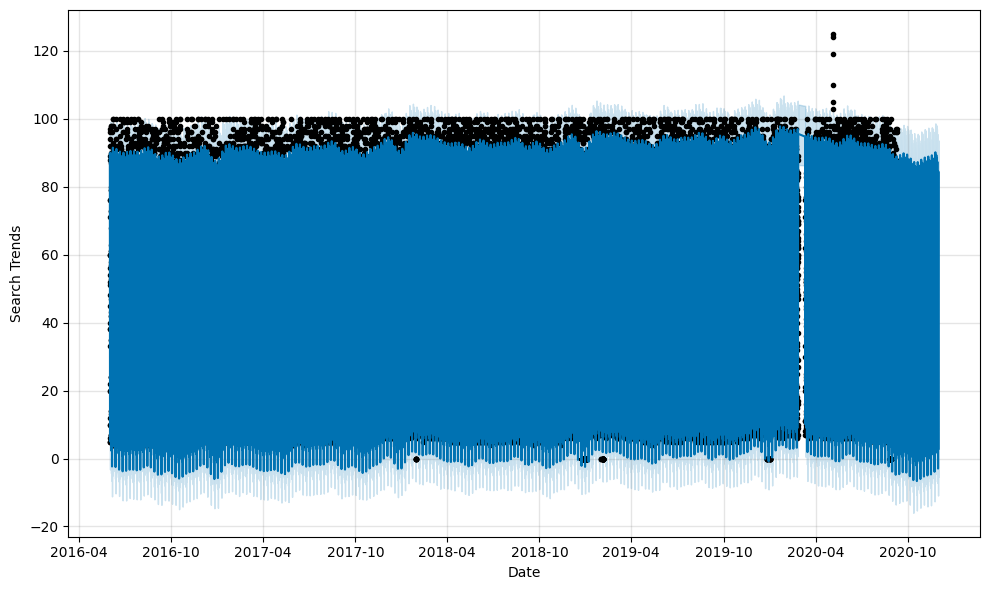

In [33]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast, xlabel='Date', ylabel='Search Trends')

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**  In the near term, particularly in the upcoming months as detailed in the forecasted periods, the model predicts a stable continuation of high search traffic. This light blue suggests sustained interest in MercadoLibre's platform, with seasonal jumps and dips.  Likely driven by ongoing consumer engagement and possibly seasonal effects that the model has learned from historical patterns.
Although not detailed in the forecast graph, the Prophet model considers seasonalities and could predict specific times of high activity such as the holiday periods or promotions, which reflects in peaks of the blue trend line.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [34]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast = forecast.set_index('ds')


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail()


,yhat,yhat_lower,yhat_upper
ds,,,
2020-11-30 04:00:00,39.781638,30.892637,48.185216
2020-11-30 05:00:00,24.310504,16.371040,32.695771
2020-11-30 06:00:00,12.344836,4.021266,20.621052
2020-11-30 07:00:00,5.072692,-4.139944,13.355115
2020-11-30 08:00:00,2.877820,-5.353016,11.871253


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

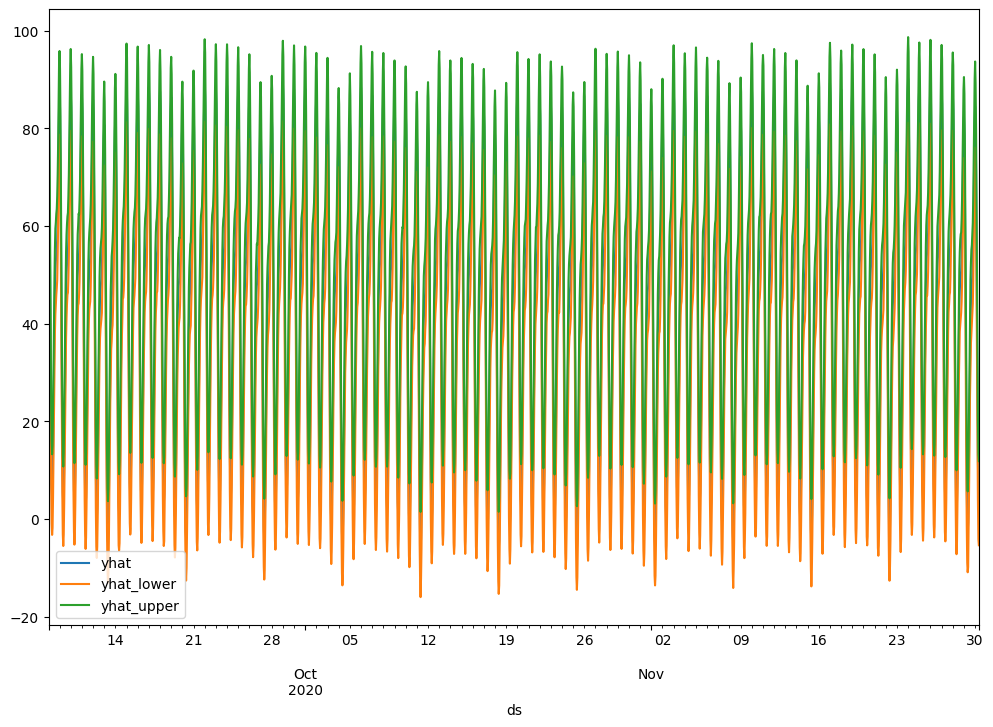

In [35]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:].plot(figsize=(12, 8))


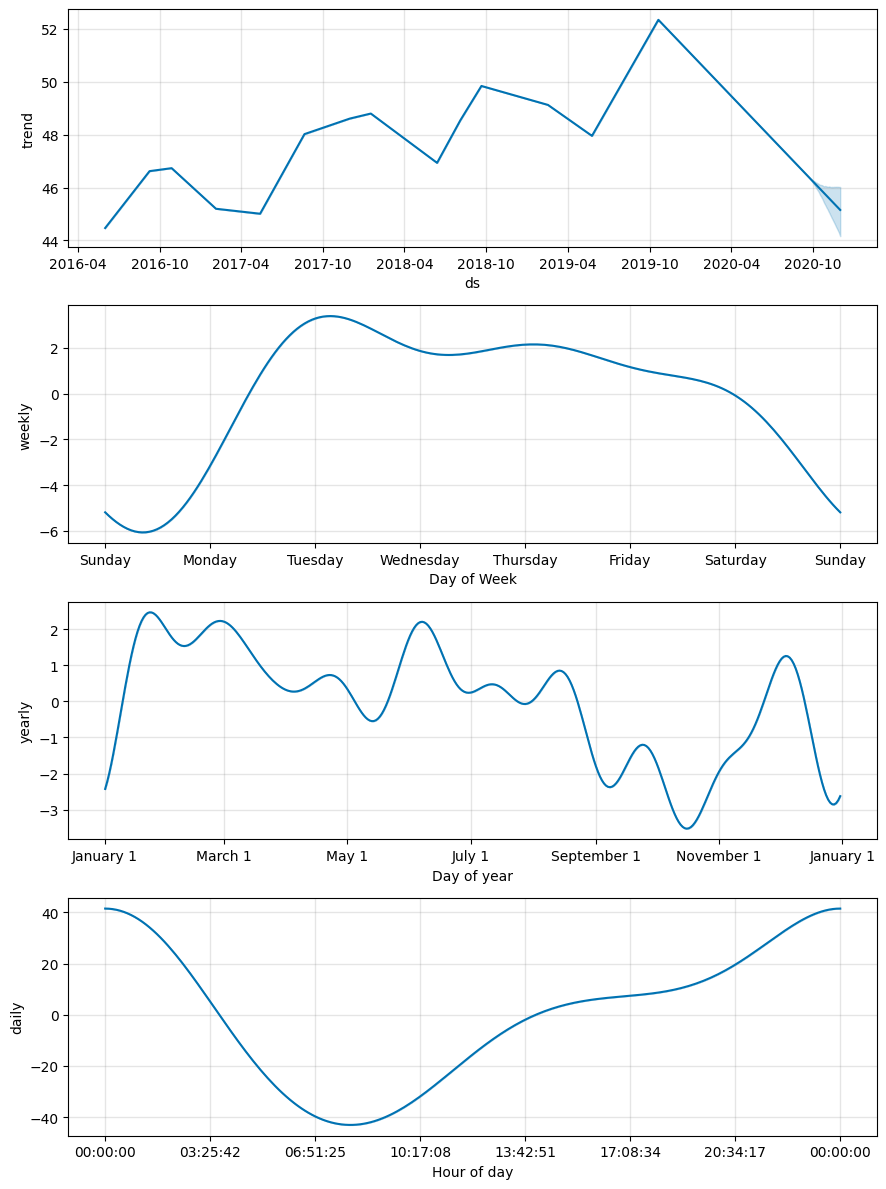

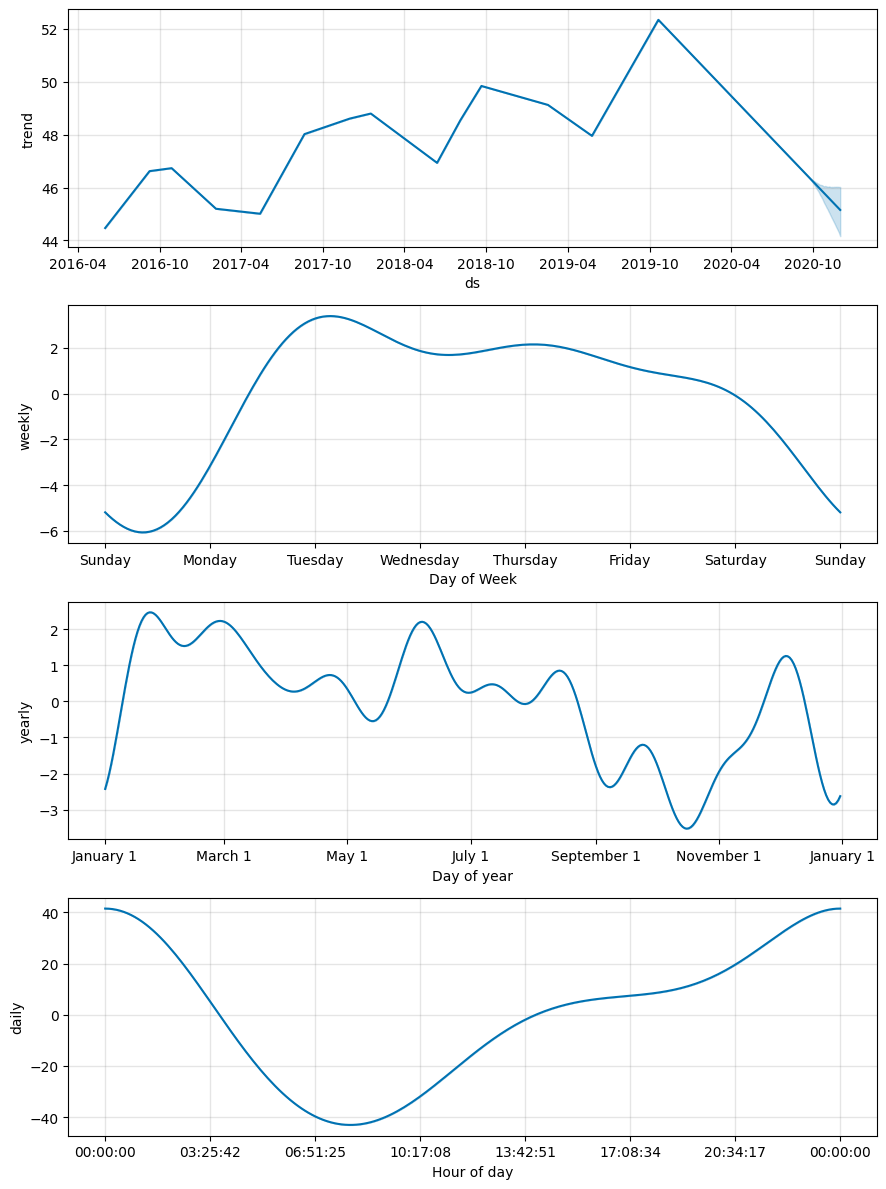

In [36]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast = forecast.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
model.plot_components(forecast)


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**The daily component plot shows that search traffic peaks around late afternoon and evening, specifically between 17:00 and 20:00. This pattern suggests that users are more actively searching for MercadoLibre during these hours, which could be attributed to people settling down after work, school, etc. and using this time to browse or shop online.

**Question:** Which day of week gets the most search traffic?
   
**Answer:**According to the weekly component plot, the search traffic on MercadoLibre is highest around mid-week, specifically on Tuesday and Wednesday. The search traffic then gradually decreases towards the weekend, with Sunday being the lowest. This insight is crucial for planning weekly marketing activities, indicating that mid-week may be the most effective time for launching new products or promotional campaigns to capture maximum users.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The lowest point for search traffic in the calendar year as indicated by the yearly trend component of the Prophet model, occurs around the end of September and early October. This period shows a noticeable dip in search activity, which could be influenced by seasonal changes, consumer behavior shifts, or other external factors like holidays or economic conditions that temporarily reduce online shopping or browsing interest.

This insight is crucial for strategic planning, allowing MercadoLibre to anticipate lower traffic during this time and possibly devise strategies to boost engagement, such as special clearance promotions, targeted holiday products, or loyalty programs to maintain consumer interest and activity during traditionally slower periods.